In [2]:
import numpy as np
from lightkurve import KeplerTargetPixelFile
from lightkurve import SimpleKeplerPRF, PRFPhotometry
from lightkurve.prf import StarPrior, BackgroundPrior, FocusPrior, MotionPrior, TPFModel, PRFPhotometry
from oktopus import UniformPrior, GaussianPrior
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
tpf = KeplerTargetPixelFile('M35_25030.fits')

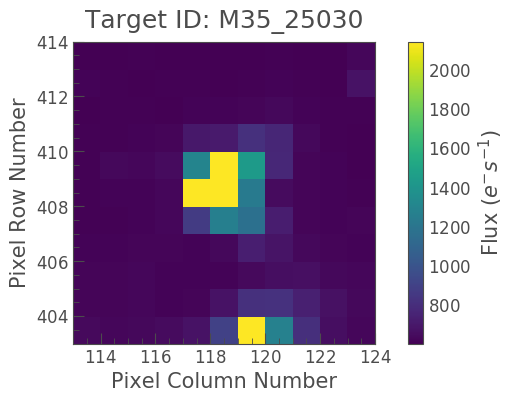

In [4]:
tpf.plot(frame=1209)

In [5]:
channel = 81

In [6]:
bgflux = np.nanpercentile(tpf.flux[0], 10)
maxflux = np.nansum(tpf.flux, axis=(1, 2)).max()
col, row = np.nanmedian(tpf.centroids(), axis=1)

/Users/acody/anaconda2/envs/astroconda3/lib/python3.6/site-packages/lightkurve/targetpixelfile.py:488: LightkurveWarning: `TargetPixelFile.centroids()` is deprecated and will be removed in Lightkurve v1.0.0, please use `TargetPixelFile.estimate_centroids()` instead.
  LightkurveWarning)


In [7]:
col,row

(118.55562928024867, 408.3126832878603)

In [30]:
model = TPFModel(star_priors=[StarPrior(col=GaussianPrior(mean=col, var=2**2),
                                        row=GaussianPrior(mean=row, var=2**2),
                                        flux=UniformPrior(lb=0, ub=maxflux),
                                        targetid=tpf.targetid)],
                 background_prior=BackgroundPrior(flux=GaussianPrior(mean=bgflux, var=bgflux)),
                 focus_prior=FocusPrior(scale_col=GaussianPrior(mean=1, var=0.0001),
                                        scale_row=GaussianPrior(mean=1, var=0.0001),
                                        rotation_angle=UniformPrior(lb=-3.1415, ub=3.1415)),
                 motion_prior=MotionPrior(shift_col=GaussianPrior(mean=0., var=0.01),
                                          shift_row=GaussianPrior(mean=0., var=0.01)),
                 prfmodel=tpf.get_prf_model(),
                 fit_background=True,
                 fit_focus=False,
                 fit_motion=True)

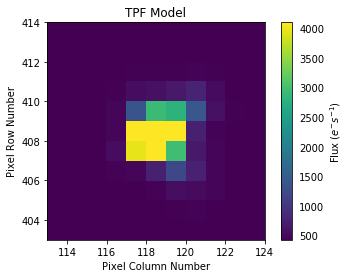

In [31]:
model.plot();

In [32]:
pp = PRFPhotometry(model)

In [33]:
pp.run(tpf.flux, pos_corr1=tpf.pos_corr1, pos_corr2=tpf.pos_corr2)

Fitting cadences: 100%|██████████| 1822/1822 [05:25<00:00,  5.60it/s]


In [12]:
pp.results[0]

  <StarParameters(
    col=118.71072459795079
    row=407.2843197695257
    flux=34616.54769873274
    targetid=None)>
  <BackgroundParameters(
    flux=561.098069954934
    fitted=True)>
  <FocusParameters(
    scale_col=[1]
    scale_row=[1]
    rotation_angle=[0.]
    fitted=False)>
  <MotionParameters(
    shift_col=0.11461619287729263
    shift_row=-5.3908843994140625
    fitted=False)>
  residual_image:
    [ -78.22255116 -114.99920855 -112.86824729 -120.47979577...
  predicted_image:
    [561.09806995 561.09808551 560.02651145 574.86337121...

In [13]:
pp.results[0].stars[0]

<StarParameters(
  col=118.71072459795079
  row=407.2843197695257
  flux=34616.54769873274
  targetid=None)>

In [22]:
flux = np.array([])
xc = np.array([])
yc = np.array([])
for i in np.arange(len(pp.results)):
    flux = np.append(flux,pp.results[i].stars[0].flux)
    xc = np.append(xc,pp.results[i].stars[0].col)
    yc = np.append(yc,pp.results[i].stars[0].row)

In [23]:
len(flux)

1822

(0.85, 1.05)

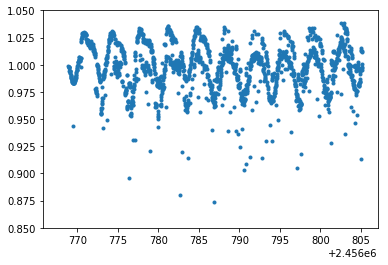

In [27]:
plt.plot(tpf.time,flux/np.median(flux),'.')
plt.ylim(0.85,1.05)

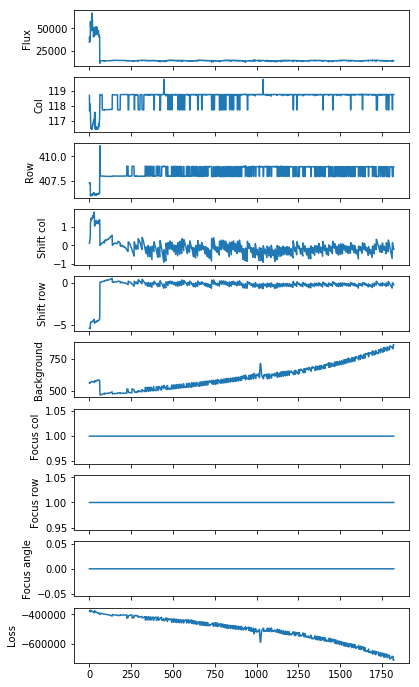

In [32]:
pp.plot_results()

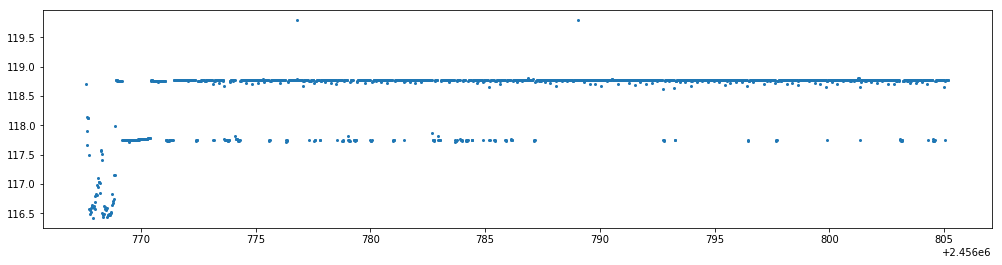

In [28]:
plt.figure(figsize=[17, 4])
plt.plot(tpf.time,xc,'o',markersize=2.)

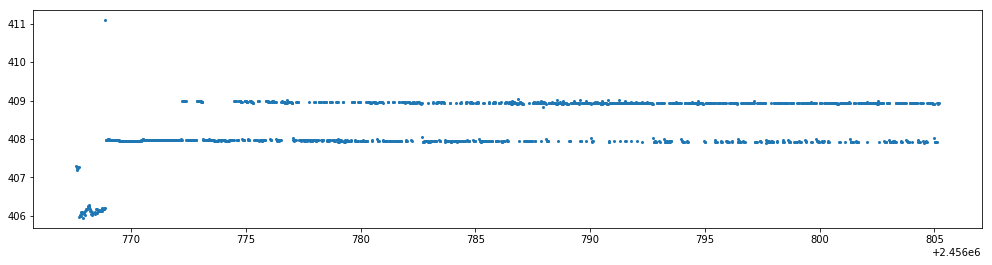

In [29]:
plt.figure(figsize=[17, 4])
plt.plot(tpf.time,yc,'o',markersize=2.)